### Name : Limalka Sadith
### Index No : 190538N

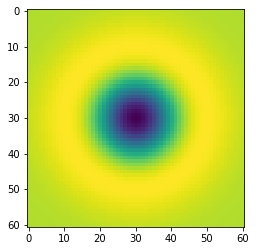

In [22]:
#Q1
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

sigma = 10
hw = 3*sigma
X, Y = np.meshgrid(np.arange(-hw, hw + 1, 1), np.arange(-hw, hw + 1, 1))
# log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + Y**2/(sigma**2) - 2)*np.exp(-(X**2 + Y**2)/(2*(sigma**2)))
log = (1/(2 * np.pi * (sigma**2)) )* np.exp(-0.5 * ( (X**2 + Y**2) / (sigma**2) )) * ( X**2/(sigma**2) + Y**2/(sigma**2) - 2 )
plt.imshow(log)
plt.show()

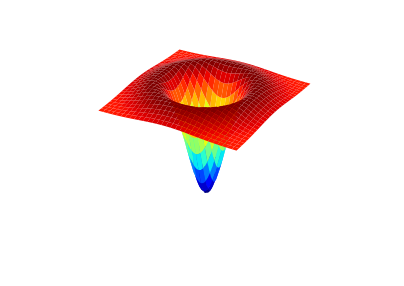

In [25]:
#Q1 - 3D plot
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

X, Y = np.meshgrid(np.arange(-hw, hw + 1, 1), np.arange(-hw, hw + 1, 1))

fig,ax = plt.subplots(figsize = (7,5))
ax1 = fig.add_subplot(111,projection='3d')
ax.axis("off")
surf1 = ax1.plot_surface(X,Y,log, cmap=cm.jet,linewidth=0, antialiased = True)
plt.axis('off')
plt.show()

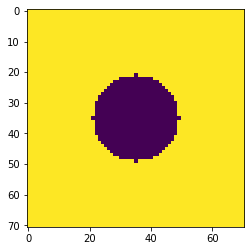

In [13]:
#Q2
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

w, h = 71, 71
hw, hh = w//2, h//2

f = np.ones((h,w),dtype=np.float32)*255
X, Y = np.meshgrid(np.arange(-hh, hh + 1, 1), np.arange(-hw, hw + 1, 1))
r = w//5 #14
f *= X**2 + Y**2 > r**2

plt.imshow(f)
plt.show()


(35, 35, 4)
9


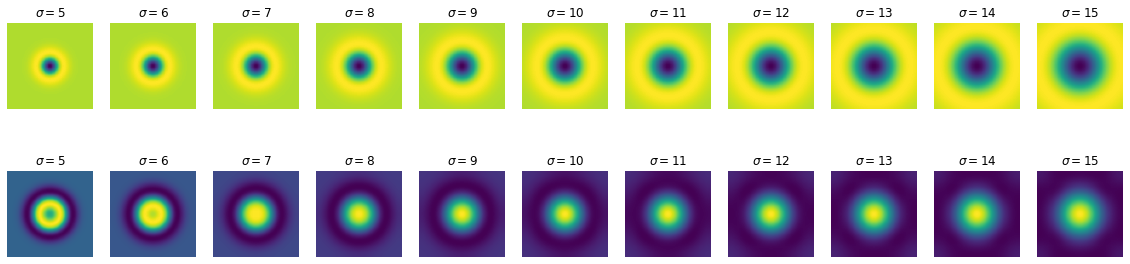

In [174]:
s = 11
fig, ax = plt.subplots(2,s,figsize=(20,5))
scale_space = np.empty((h,w,s),dtype= np.float32)
sigmas = np.arange(5,16,1)
for i,sigma in enumerate(sigmas):
    log_hw = 3*np.max(sigmas)
    X, Y = np.meshgrid(np.arange(-hw, hw + 1, 1), np.arange(-hw, hw + 1, 1))
    log = (1/(2 * np.pi * (sigma**2)) )* np.exp(-0.5 * ( (X**2 + Y**2) / (sigma**2) )) * ( X**2/(sigma**2) + Y**2/(sigma**2) - 2 )
    f_log = cv.filter2D(f,-1,log)
    scale_space[:,:,i] = f_log
    ax[0,i].imshow(log)
    ax[0,i].axis('off')
    ax[0,i].set_title(r'$\sigma = {}$'.format(sigma))
    ax[1,i].imshow(f_log)
    ax[1,i].axis('off')
    ax[1,i].set_title(r'$\sigma = {}$'.format(sigma))

indices = np.unravel_index(np.argmax(scale_space, axis=None), scale_space.shape)
print(indices)
print(sigmas[indices[2]])

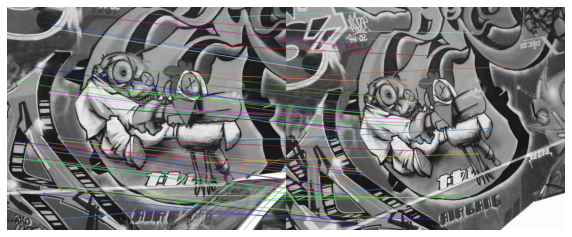

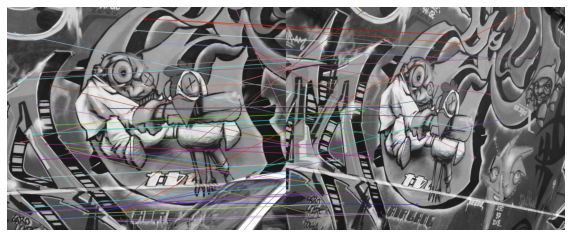

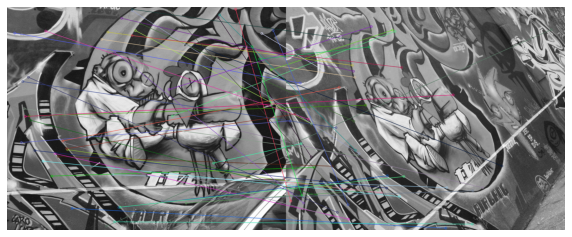

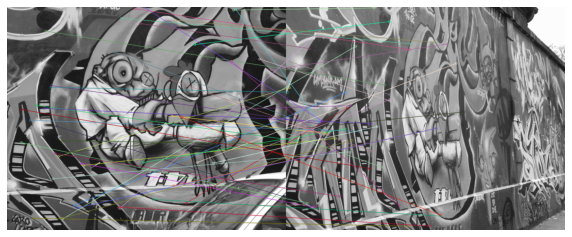

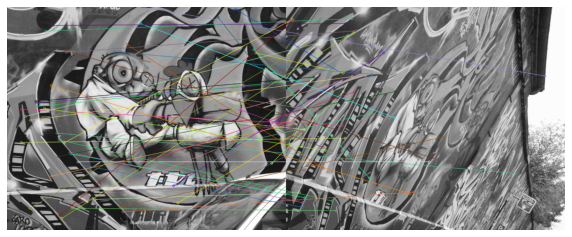

In [20]:
#Q3 
import numpy as np   
import cv2 as cv   
import matplotlib.pyplot as plt

for i in range(2,7):
    img1 = cv.imread('images\img1.ppm')   
    img2 = cv.imread('images\img{}.ppm'.format(i))  
    img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)   
    img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)  

    sift = cv.SIFT_create()  
    keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)   
    keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)  

    bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)  
    matches = bf.match(descriptors_1,descriptors_2)  
    matches = sorted(matches, key = lambda x:x.distance)  
    img3 = cv.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2 , flags=2)  
    # fig, ax1 = plt.subplots(1,2,figsize=(10,5)) 
    # ax1[0].imshow(img1,cmap = 'gray')   
    # ax1[1].imshow(img2, cmap = 'gray')  
    fig, ax2 = plt.subplots(figsize=(10,5))   
    ax2.imshow(img3)
    ax2.axis('off')
    plt.show()  

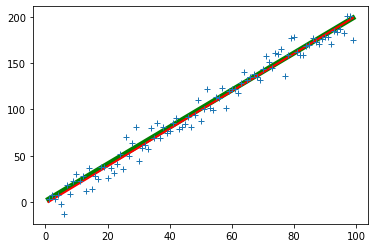

In [101]:
#Q4
m = 2 # Line equation : y = m*x + c . m is the slope . c is the intercept .
c = 1
x = np.arange (1, 100, 1)
np.random.seed(45)
sigma = 10
noise = sigma * np.random.randn(len(x))
o = np.zeros (x.shape)
# o[=1] = 20
y = m*x + c + noise + o

n = len(x)
X = np.concatenate([x.reshape(n,1), np.ones((n,1))], axis = 1)
B = np.linalg.pinv(X.T @ X) @ X.T @ y
mstar = B[0]
cstar = B[1]

plt.plot([x[0],x[-1]],[m*x[0] + c, m*x[-1] + c ],color = 'g',label=r'True Line',linewidth = 5)
plt.plot([x[0],x[-1]],[mstar*x[0] + cstar, mstar*x[-1] + cstar],color = 'r',label=r'Estimated Line',linewidth = 2)
plt.plot(x,y,'+',label= 'noisy points')
plt.show()


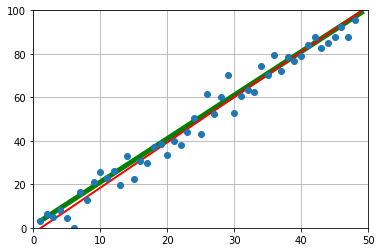

In [160]:
#Q5
m = 2 # Line equation : y = m*x + c . m is the slope . c is the intercept .
c = 1
x = np.arange (1, 50, 1)

np.random.seed(45)
sigma = 5
noise = sigma * np.random.randn(len(x))
o = np.zeros (x.shape)
# o[=1] = 20
y = m*x + c + noise + o

n = len(x)
u11 = np.sum((x - np.mean(x))**2)
u12 = np.sum((x - np.mean(x))*(y-np.mean(y)))
u21 = u12
u22 = np.sum((y - np.mean(y))**2)

U = np.array([[u11,u12], [u21, u22]])
W, V = np.linalg.eig(U)
ev_corresponding_to_smallest_ev = V[:, np.argmin(W)]

a = ev_corresponding_to_smallest_ev[0]
b = ev_corresponding_to_smallest_ev[1]
d = a*np.mean(x)  + b*np.mean(y)

mstar =  - a/b
cstar = d/b

plt.plot([x[0],x[-1]],[m*x[0] + c, m*x[-1] + c ],color = 'g',label=r'True Line',linewidth = 5)
plt.plot([x[0],x[-1]],[mstar*x[0] + cstar, mstar*x[-1] + cstar],color = 'r',label=r'Estimated Line',linewidth = 2)
plt.plot(x,y,'o',label= 'noisy points')

plt.xlim([0, 50])
plt.ylim([0, 100])
plt.grid()
plt.show()